In [10]:
# Importing necessary libraries
from scripts.data_processing import load_data, clean_data, segment_users, get_top_handsets, get_top_manufacturers, get_top_handsets_per_manufacturer
from scripts.eda_functions import basic_metrics, compute_dispersion, bivariate_analysis, compute_correlation_matrix
from scripts.visualizations import plot_univariate, plot_bivariate, plot_correlation_matrix
from scripts.pca_functions import apply_pca, interpret_pca

# Import the function from the script
from notebooks.scripts.db_connection import get_data_from_postgres




In [12]:
# Define database configuration
db_config = {
    'host': 'localhost',
    'database': 'telecom_data',
    'user': 'postgres',
    'password': 'Lkj;Asdf!@'
}

# Define SQL query
query = "SELECT * FROM xdr_data"

# Get data from PostgreSQL
df = get_data_from_postgres(query, db_config)


C:\Users\solom\AppData\Local\Temp\ipykernel_23780\1633169912.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [13]:
df = pd.read_sql(query, conn)

# Display the data
df.head()


C:\Users\solom\AppData\Local\Temp\ipykernel_23780\132776588.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [14]:
# # Load the dataset and check data frame columsn
# df = load_data('../data/Week2_challenge_data_source(CSV).csv')
# print(df.columns)


In [15]:

# Clean the dataset
df = clean_data(df)

In [16]:
# Identify top 10 handsets
top_handsets = get_top_handsets(df)
print(top_handsets)


Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64


In [17]:
# Identify top 3 manufacturers
top_manufacturers = get_top_manufacturers(df)
print(top_manufacturers)

Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64


In [18]:
# Identify top 5 handsets per top 3 manufacturers
top_handsets_manufacturers = get_top_handsets_per_manufacturer(df, top_manufacturers.index)
print(top_handsets_manufacturers)

{'Apple': Handset Type
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: count, dtype: int64, 'Samsung': Handset Type
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: count, dtype: int64, 'Huawei': Handset Type
Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: count, dtype: int64}


In [19]:
# Segment users and calculate total data
df = segment_users(df, 'Activity Duration DL (ms)')
print(df.head())

      Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Location Name  ...  Netflix DL (Bytes)  Netflix UL (Bytes)  \
0  9.16456699548519E+015  ...           8198936.0           9656251.0   
1                L77566A  ...          18338413.0          17227132.0   

In [20]:


# Perform basic EDA
metrics = basic_metrics(df)
print(metrics)


          Bearer Id       Start ms         End ms     Dur. (ms)          IMSI  \
count  1.500010e+05  150001.000000  150001.000000  1.500010e+05  1.500010e+05   
mean   1.013887e+19     499.188200     498.800880  1.046086e+05  2.082016e+14   
std    2.883600e+18     288.610872     288.096693  8.103735e+04  2.144722e+10   
min    6.917538e+18       0.000000       0.000000  7.142000e+03  2.040471e+14   
25%    7.349883e+18     250.000000     251.000000  5.744200e+04  2.082014e+14   
50%    7.349883e+18     499.000000     500.000000  8.639900e+04  2.082015e+14   
75%    1.304243e+19     749.000000     750.000000  1.324300e+05  2.082018e+14   
max    1.318654e+19     999.000000     999.000000  1.859336e+06  2.140743e+14   

       MSISDN/Number          IMEI  Avg RTT DL (ms)  Avg RTT UL (ms)  \
count   1.500010e+05  1.500010e+05    150001.000000    150001.000000   
mean    4.188282e+10  4.847455e+13       109.795706        17.662883   
std     2.438731e+12  2.237359e+13       559.342620   

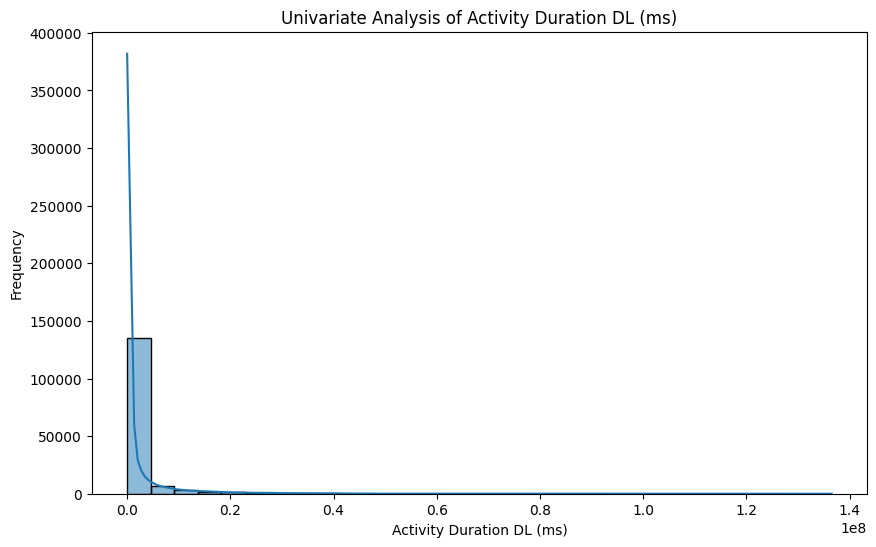

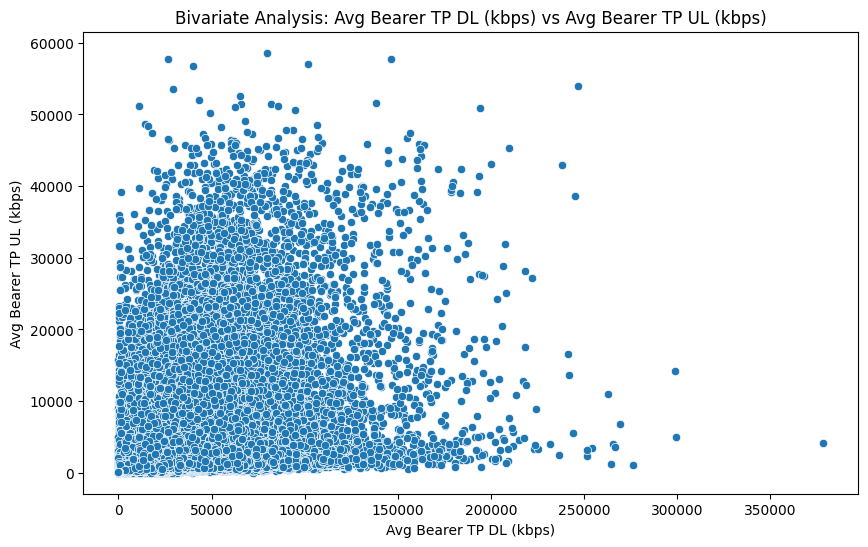

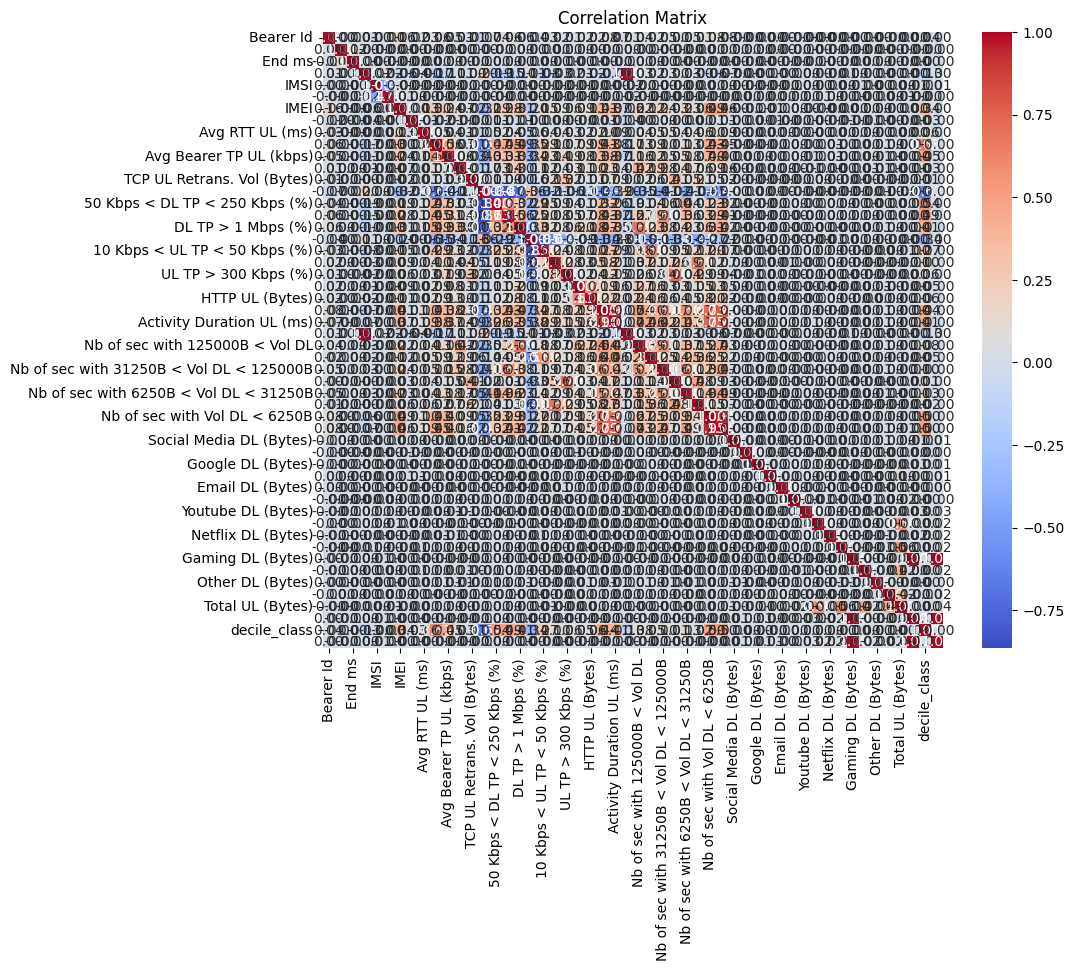

In [21]:

# Univariate analysis
plot_univariate(df, 'Activity Duration DL (ms)')
plot_bivariate(df, 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)')
plot_correlation_matrix(df)

In [22]:
# Assuming total data as the sum of total download and upload bytes
df['total_data'] = df['Total DL (Bytes)'] + df['Total UL (Bytes)']

# Perform bivariate analysis
features = ['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)', 
            'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 
            'Other DL (Bytes)', 'Social Media UL (Bytes)', 'Google UL (Bytes)', 
            'Email UL (Bytes)', 'Youtube UL (Bytes)', 'Netflix UL (Bytes)', 
            'Gaming UL (Bytes)', 'Other UL (Bytes)']

bivariate_results = bivariate_analysis(df, 'total_data', features)
print(bivariate_results)

{'Social Media DL (Bytes)': np.float64(0.005380231866987599), 'Google DL (Bytes)': np.float64(0.012108012591746523), 'Email DL (Bytes)': np.float64(0.0042827311003288005), 'Youtube DL (Bytes)': np.float64(0.025642313668621085), 'Netflix DL (Bytes)': np.float64(0.02433133481272131), 'Gaming DL (Bytes)': np.float64(0.998068355700749), 'Other DL (Bytes)': np.float64(-0.002795283896206436), 'Social Media UL (Bytes)': np.float64(0.00019587623318301225), 'Google UL (Bytes)': np.float64(0.0058399896601537766), 'Email UL (Bytes)': np.float64(-0.0014827682105814693), 'Youtube UL (Bytes)': np.float64(0.023721830191501283), 'Netflix UL (Bytes)': np.float64(0.024943617943750156), 'Gaming UL (Bytes)': np.float64(0.02043118617237015), 'Other UL (Bytes)': np.float64(0.017938052415592296)}


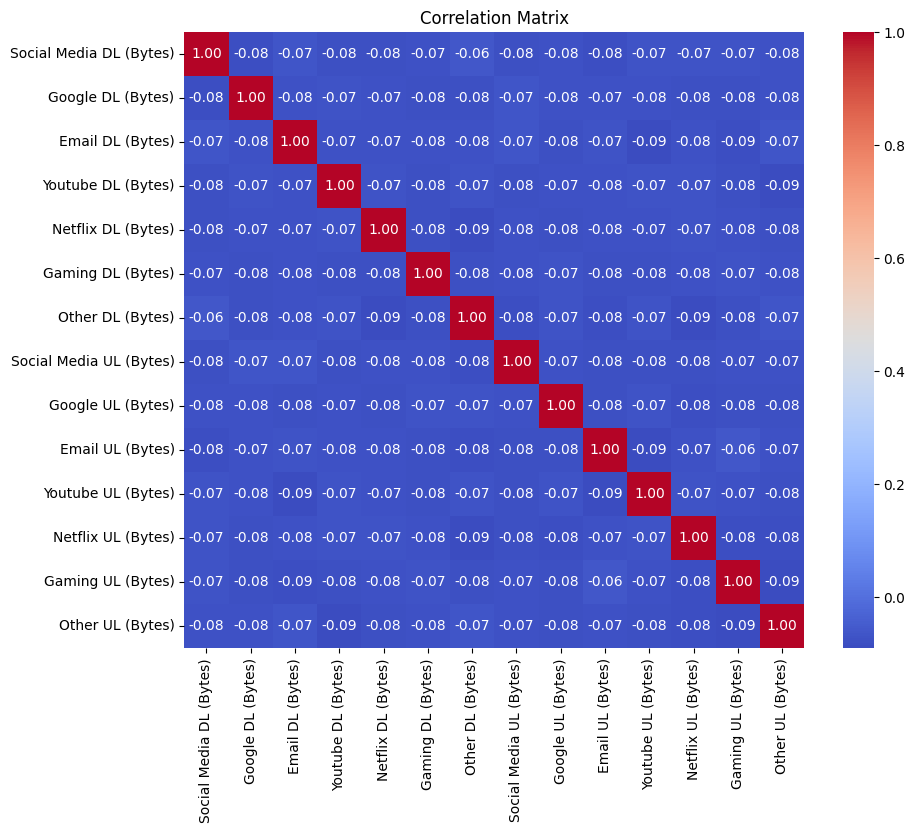

In [23]:


# Correlation matrix for app data
corr_matrix = compute_correlation_matrix(df, features)
plot_correlation_matrix(corr_matrix)

In [24]:

# Apply PCA for dimensionality reduction
pca_results, explained_variance = apply_pca(df, features, n_components=2)
interpret_pca(pca_results, explained_variance)

Explained variance by principal components: 0.9980558069053356
First component contributes -50933878.21, second component contributes -283388277.90
